<a href="https://colab.research.google.com/github/AkramHussainKhan/adultuci/blob/main/adultuci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("dplyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")


In [ ]:
install.packages("tidyr")


In [ ]:
install.packages("rpart")


In [53]:
install.packages("rpart.plot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("e1071")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("factoextra")
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [47]:
library(caret)
library(e1071)
library(factoextra)
library(cluster)

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [15]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(ggplot2)

In [18]:
library(tidyr)
library(rpart)



Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [54]:
library(rpart.plot)

In [5]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [6]:
library(cluster)

In [10]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




## Data Descriptions

In [11]:
data('AdultUCI')
dim(AdultUCI)

[1] 48842    15

It has 15 variables and 48882 observations.Using `str()`, we will get a basic idea about the data set.

In [12]:
str(AdultUCI)

'data.frame':	48842 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 8 levels "Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Ord.factor w/ 16 levels "Preschool"<"1st-4th"<..: 14 14 9 7 14 15 5 9 15 14 ...
 $ education-num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital-status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels "Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital-gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital-loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours-per-week: int  40

All of the variable types in this data collection are visible here. This data collection has 48842 observations of each of the 15 variables, which are subdivided into 9 factors and 6 integer variables. Education and income are two ordered factor variables, as is evident.

Now, we will see the first 6 rows of this data set for better understanding about data.

In [13]:
head(AdultUCI)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
,<int>,<fct>,<int>,<ord>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<ord>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,small


# Data Preprocessing

## Missing Value Handling

Analytical issues arise from missing values. We must therefore take care of any missing values. Here, we first depict the values that are missing.

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.
ℹ The deprecated feature was likely used in the dplyr package.
  Please report the issue at <https://github.com/tidyverse/dplyr/issues>.”


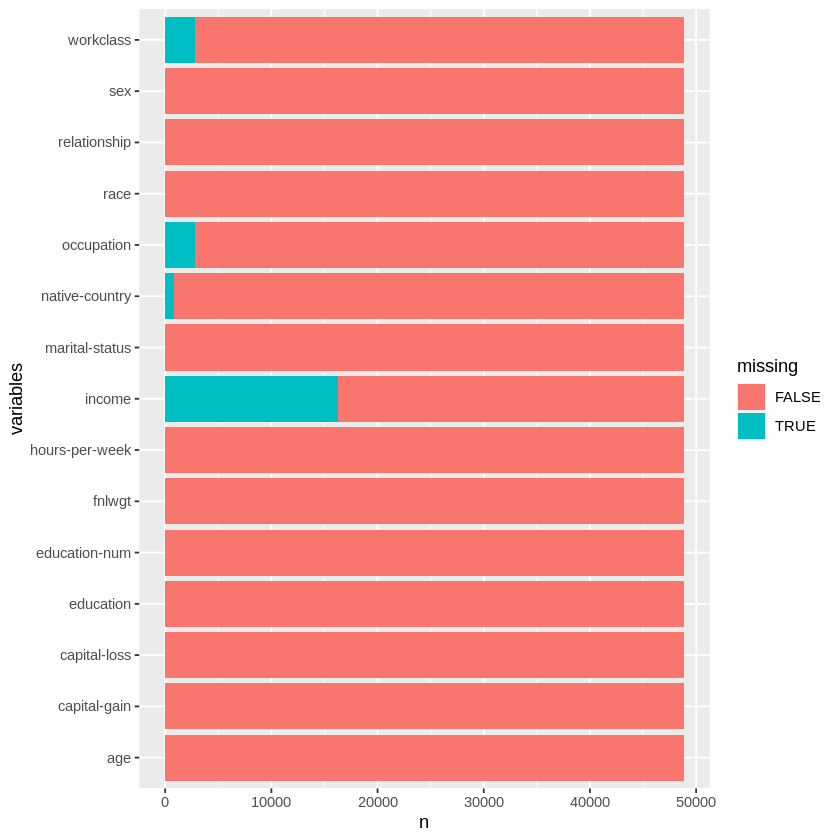

In [19]:
AdultUCI %>%
  summarise_all(list(~is.na(.)))%>%
  pivot_longer(everything(),
               names_to = "variables", values_to="missing") %>%
  count(variables, missing) %>%
  ggplot(aes(y=variables,x=n,fill=missing))+
  geom_col()


Here, we can see that there are few missing values in our data set. Now we will remove the missing values for further analysis.

In [20]:
AdultUCI<-na.omit(AdultUCI)

Now, again we are plotting missing values. Now we can see that there are no missing values anymore.

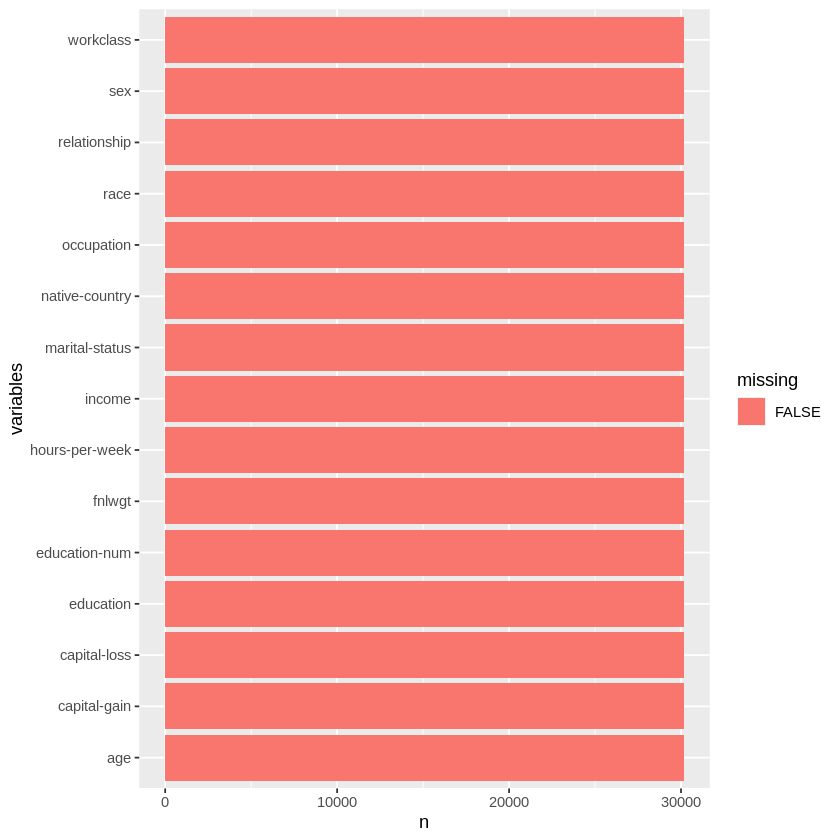

In [21]:
AdultUCI %>%
  summarise_all(list(~is.na(.)))%>%
  pivot_longer(everything(),
               names_to = "variables", values_to="missing") %>%
  count(variables, missing) %>%
  ggplot(aes(y=variables,x=n,fill=missing))+
  geom_col()

In [22]:
dim(AdultUCI)

[1] 30162    15

Now we have 30162 observations and 15 variables.

## Grouping Categories

As lowering categories have a greater impact on our model, we will attempt to record them into the same variable for analysis purposes.

Here, we attempted to condense the categories for education.

In [23]:
AdultUCI <- AdultUCI %>% 
  mutate(education=recode(education,
                          "Preschool"="HS-grad or less",
                            "1st-4th"="HS-grad or less",
                            "5th-6th"="HS-grad or less",
                            "7th-8th"="HS-grad or less",
                            "9th"="HS-grad or less",
                             "10th"="HS-grad or less",
                          "11th"="HS-grad or less",
                          "12th"="HS-grad or less",
                          "HS-grad"="HS-grad or less"))

Here, we keeping 11 most frequent countries and keep others as rest.

In [24]:
AdultUCI$`native-country`<-as.character(AdultUCI$`native-country`)
AdultUCI$`native-country`<- with(AdultUCI, ifelse(`native-country` %in% c("United-States","Mexico", "Philippines","Germany","Puerto-Rico","Canada", "El-Salvador","India","Cuba","England","China"),`native-country`, "Rest"))
AdultUCI$`native-country`<-as.factor(AdultUCI$`native-country`)

# Summary of the Dataset

## Summary Measures for Numeric Variables

Now, we can find the summary measures for all the numerical columns.

In [25]:
numeric_cols_df <- select_if(AdultUCI, is.numeric) %>%
  tidyr::gather(key = "Variable", value = "value") %>%
  group_by(Variable)%>% 
  summarise(Minimum = min(value, na.rm = T),
            Maximum = max(value, na.rm = T),
            Mean= round(mean(value, na.rm=T), 2),
            Median = round(median(value,na.rm = T),2),
            Sd = round(sd(value, na.rm = TRUE),2))


(numeric_cols_df)

Variable,Minimum,Maximum,Mean,Median,Sd
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
age,17,90,38.44,37,13.13
capital-gain,0,99999,1092.01,0,7406.35
capital-loss,0,4356,88.37,0,404.30
education-num,1,16,10.12,10,2.55
fnlwgt,13769,1484705,189793.83,178425,105652.97
hours-per-week,1,99,40.93,40,11.98


We present here,minimum, maximum, mean, median and standard deviation.

## Plots of Categorical Variable

For summary measures of categorical variables we can choose each factor variable and depict its categories frequency.

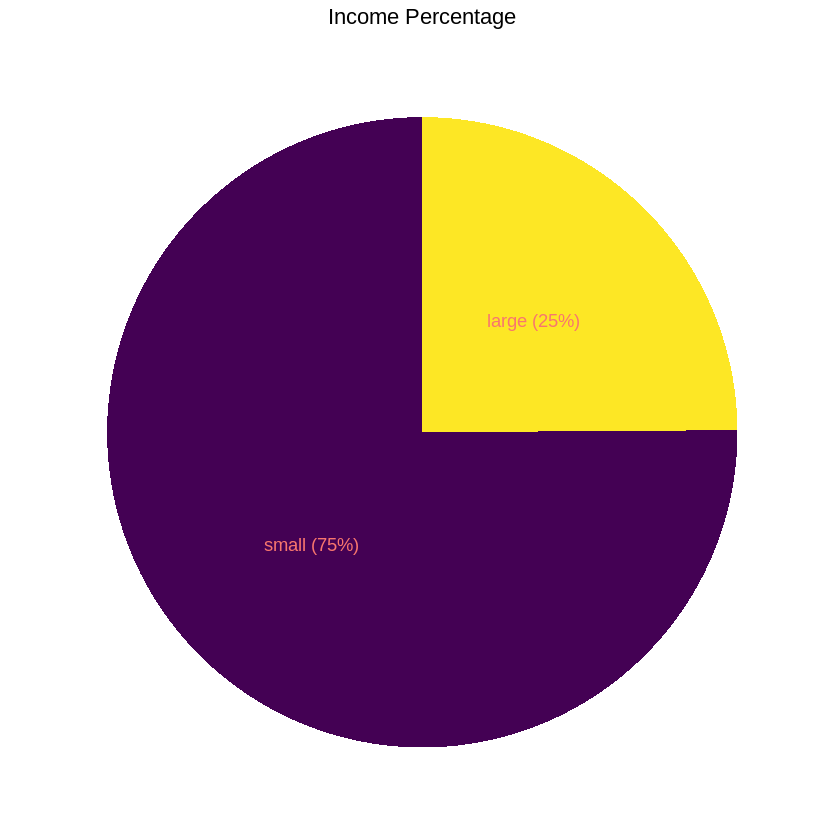

In [27]:
AdultUCI%>%group_by(income)%>%
                         summarise(count = n()) %>% 
  mutate(share=count/sum(count)*100.0) %>%
  arrange(count)%>%
  ggplot(aes("", y = share, fill = income)) +
  ggtitle("Income Percentage")+
  geom_col() +
   geom_text(aes(label = paste0(income," (",round(share), "%)"),col="red"), 
              position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  theme(panel.background = element_rect(fill = "white"),
        panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank(),plot.title = element_text(hjust = 0.5),
        legend.position = "none")

Here, 75 % observations are small income and 25 % are large income.

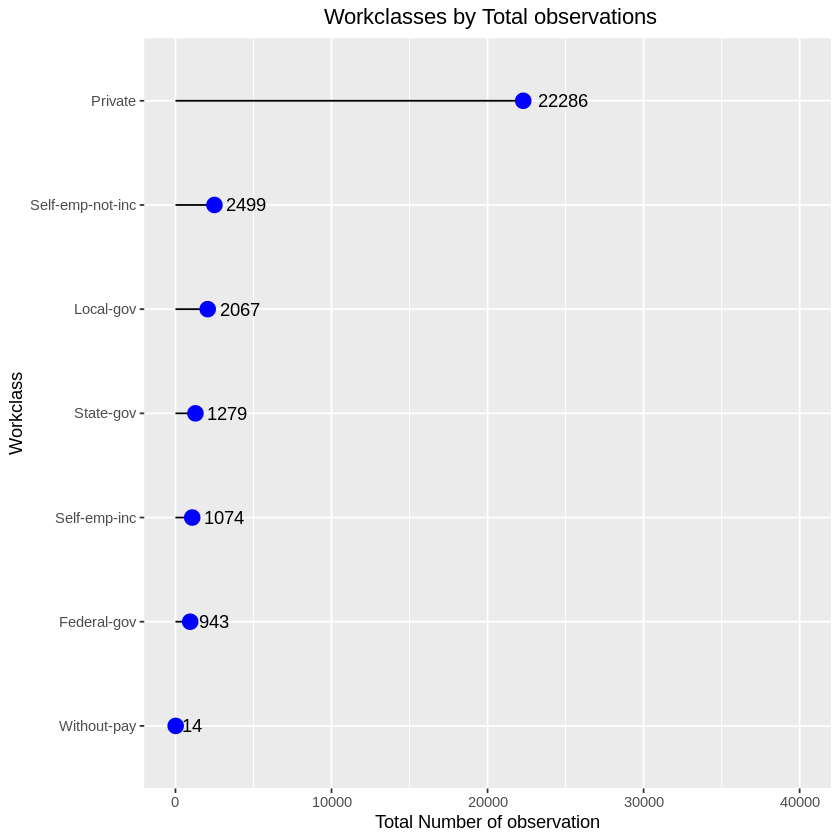

In [32]:
AdultUCI%>%group_by(workclass)%>%
                         summarise(total = n()) %>%
  arrange(total)%>% filter(workclass!="NA")%>% 
  mutate(name=factor(workclass, levels= workclass)) %>%  
  ggplot( aes(x=name, y=total)) +
  ggtitle(" Workclasses by Total observations")+
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="blue") +
  geom_text(aes(label=total),hjust = -0.3)+ 
  ylim(c(0,40000))+
    coord_flip() +theme(plot.title = element_text(hjust = 0.5))+
    xlab("Workclass") +
    ylab("Total Number of observation")

We can see that most observations are from private category in workclass.

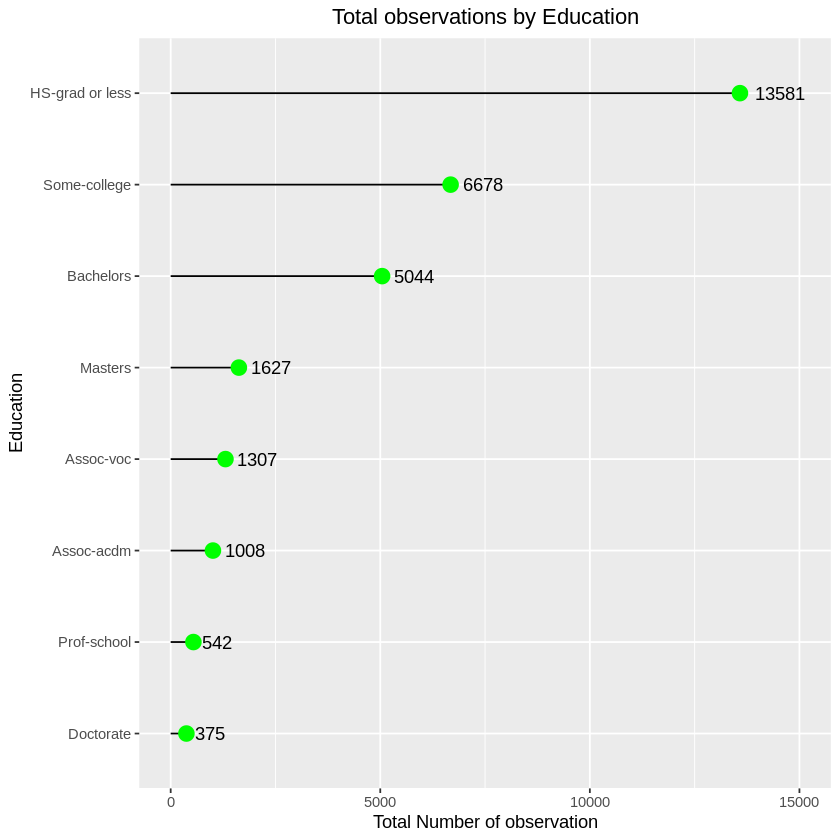

In [33]:
AdultUCI%>%group_by(education)%>%
                         summarise(total = n()) %>%
  arrange(total)%>% filter(education!="NA")%>% 
  mutate(name=factor(education, levels= education)) %>%  
  ggplot( aes(x=name, y=total)) +
  ggtitle("Total observations by Education")+
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="green") +
  geom_text(aes(label=total),hjust = -0.3)+ 
  ylim(c(0,15000))+
    coord_flip() +theme(plot.title = element_text(hjust = 0.5))+
    xlab("Education") +
    ylab("Total Number of observation")

In education maximum observations are under HS-grad or less category.

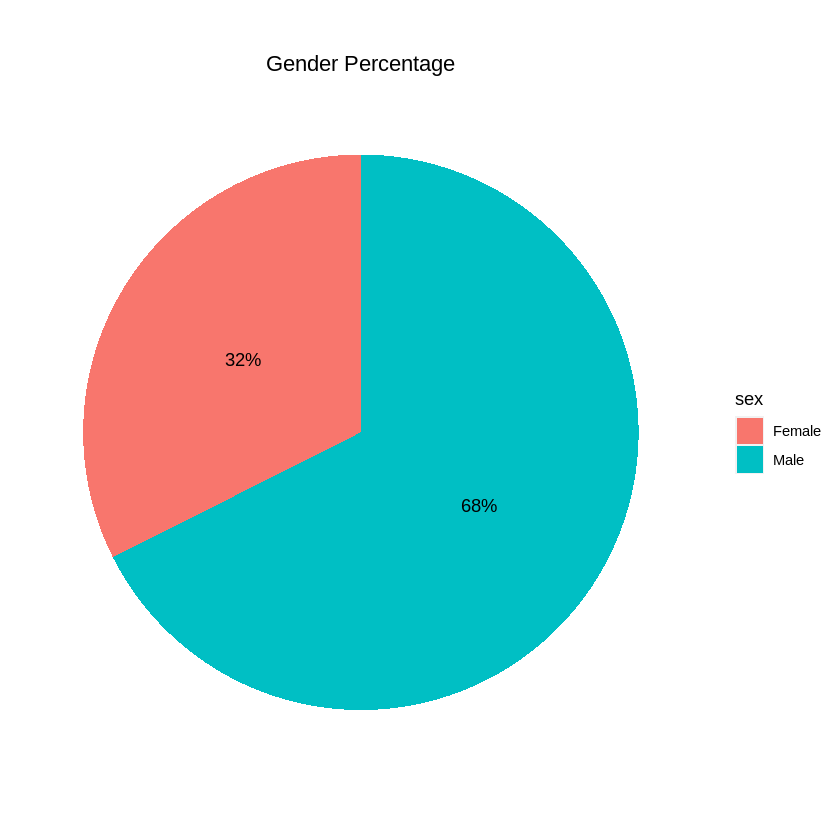

In [34]:
AdultUCI%>%group_by(sex)%>%
                         summarise(count = n()) %>% 
  mutate(share=count/sum(count)*100.0) %>%
  arrange(count)%>%
  ggplot(aes("", y = share, fill = sex)) +
  ggtitle("Gender Percentage")+
  geom_col() +
   geom_text(aes(label = paste0(round(share), "%")), 
              position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  theme(panel.background = element_rect(fill = "white"),
        panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),plot.title = element_text(hjust = 0.5),
        axis.text = element_blank())

Here, 68 % observations are male and 32 % are female.

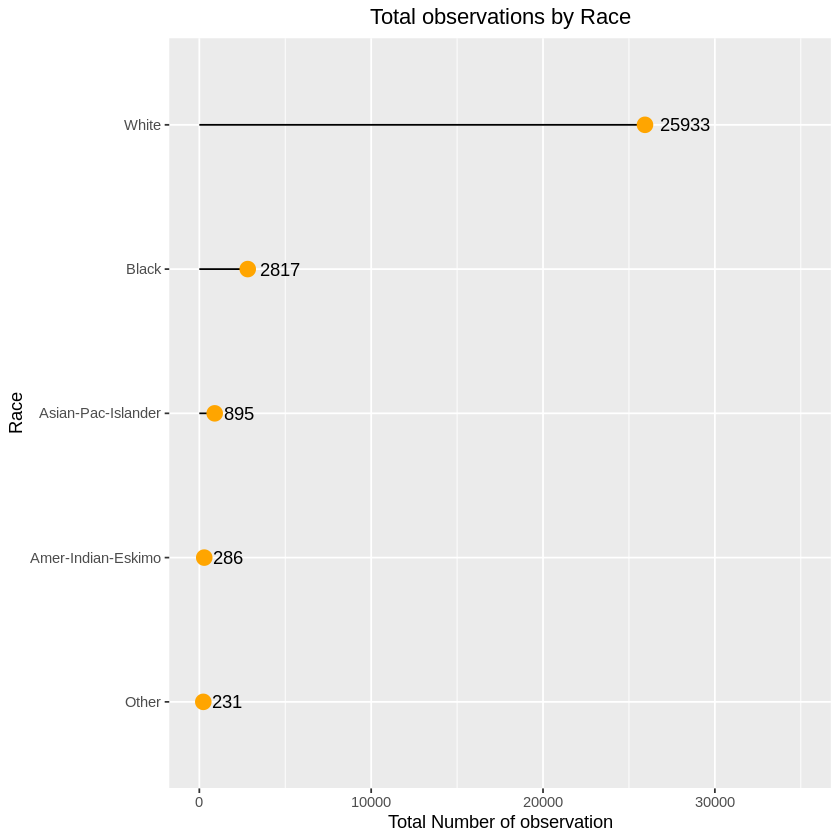

In [35]:
AdultUCI%>%group_by(race)%>%
                         summarise(total = n()) %>%
  arrange(total)%>% filter(race!="NA")%>% 
  mutate(name=factor(race, levels= race)) %>%  
  ggplot( aes(x=name, y=total)) +
  ggtitle("Total observations by Race")+
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="orange") +
  geom_text(aes(label=total),hjust = -0.3)+ 
  ylim(c(0,35000))+
    coord_flip() +theme(plot.title = element_text(hjust = 0.5))+
    xlab("Race") +
    ylab("Total Number of observation")

White races observations are highest.

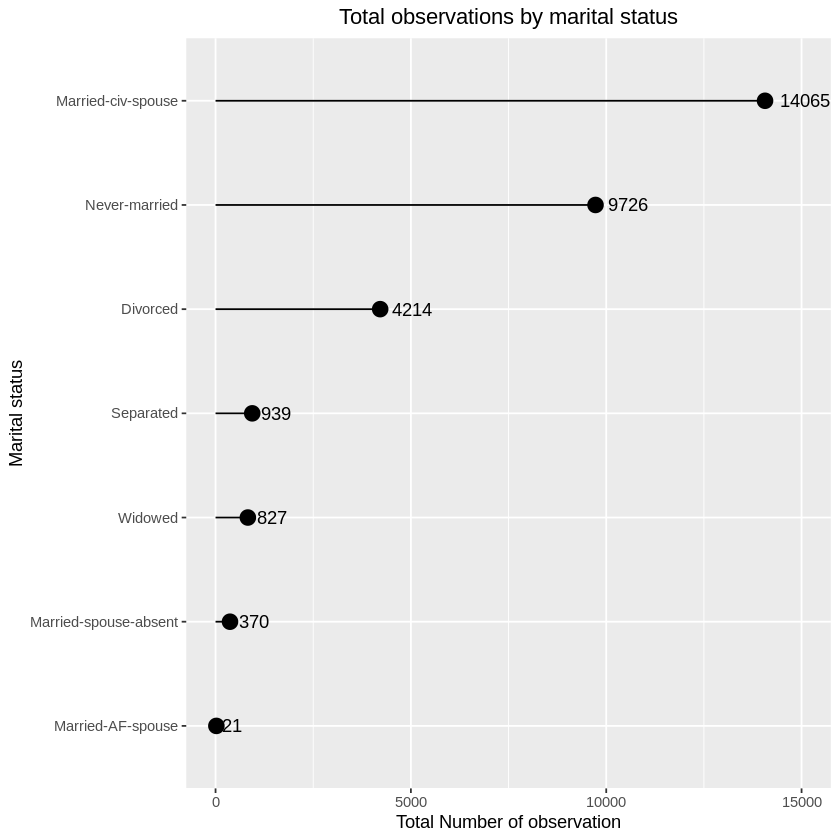

In [36]:
AdultUCI%>%group_by(`marital-status`)%>%
  summarise(total = n()) %>%
  arrange(total)%>%
  mutate(name=factor(`marital-status`, levels= `marital-status`)) %>%  
  ggplot( aes(x=name, y=total)) +
  ggtitle("Total observations by marital status")+
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="black") +
  geom_text(aes(label=total),hjust = -0.3)+ 
  ylim(c(0,15000))+
    coord_flip() +theme(plot.title = element_text(hjust = 0.5))+
    xlab("Marital status") +
    ylab("Total Number of observation")

Married-civ-spouse and never married persons are highest in our dataset.

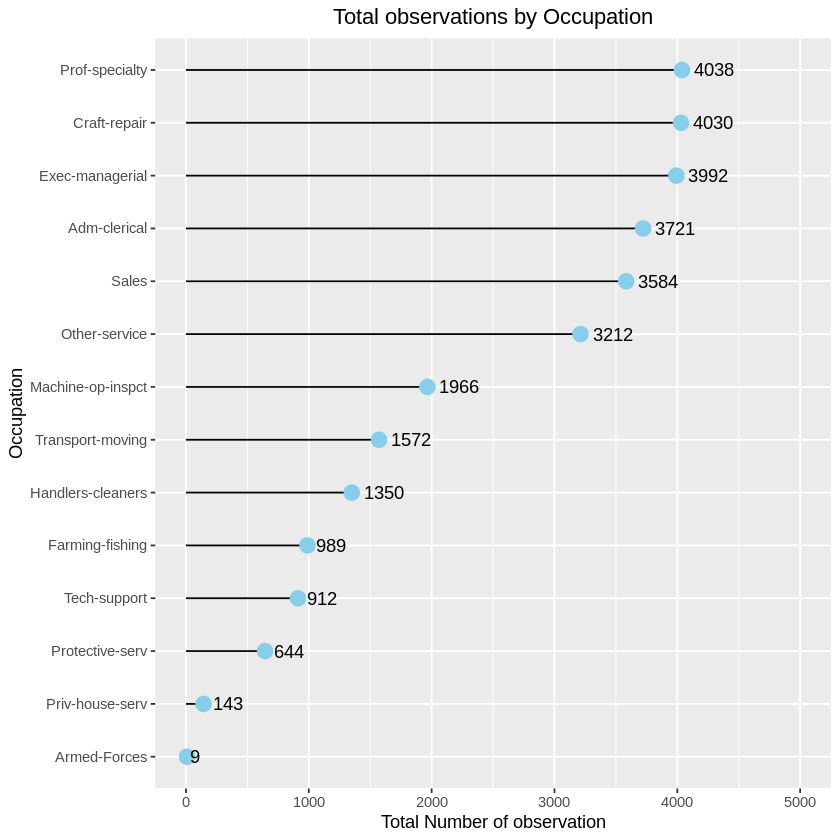

In [37]:
AdultUCI%>%group_by(occupation)%>%
                         summarise(total = n()) %>%
  arrange(total)%>% 
  mutate(name=factor(occupation, levels= occupation)) %>%  
  ggplot( aes(x=name, y=total)) +
  ggtitle("Total observations by Occupation")+
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="skyblue") +
  geom_text(aes(label=total),hjust = -0.3)+ 
  ylim(c(0,5000))+
    coord_flip() +theme(plot.title = element_text(hjust = 0.5))+
    xlab("Occupation") +
    ylab("Total Number of observation")

Maximum peoples are from Prof-specialty, craft-repair occupations.

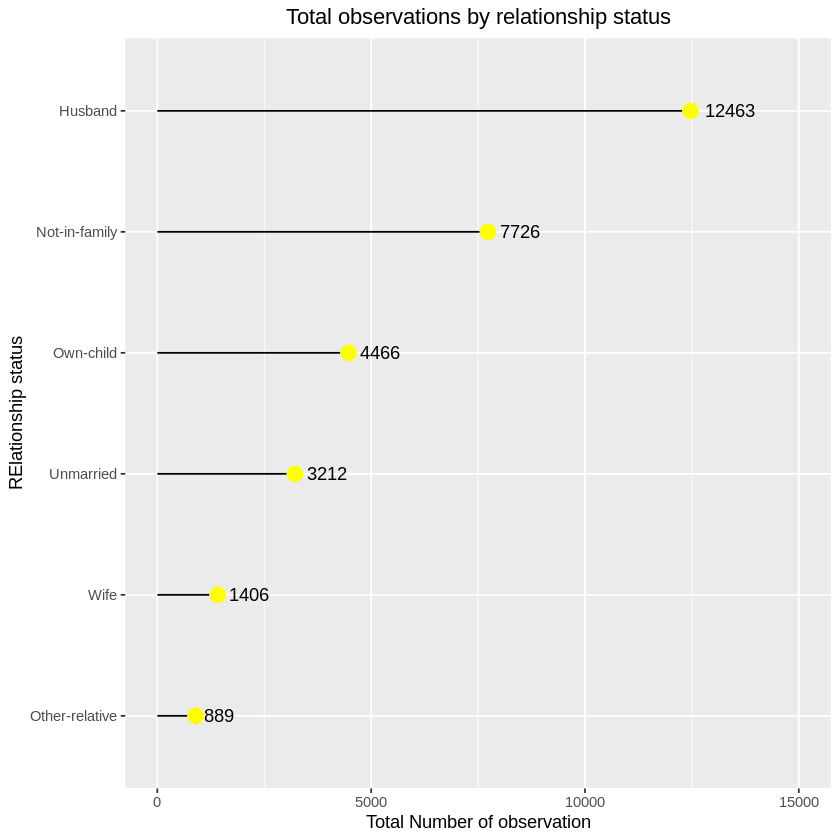

In [38]:
AdultUCI%>%group_by(relationship)%>%
                         summarise(total = n()) %>%
  arrange(total)%>% 
  mutate(name=factor(relationship, levels= relationship)) %>%  
  ggplot( aes(x=name, y=total)) +
  ggtitle("Total observations by relationship status")+
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="yellow") +
  geom_text(aes(label=total),hjust = -0.3)+ 
  ylim(c(0,15000))+
    coord_flip() +theme(plot.title = element_text(hjust = 0.5))+
    xlab("RElationship status") +
    ylab("Total Number of observation")

Husbands are the highest number of respondents in our datasets.

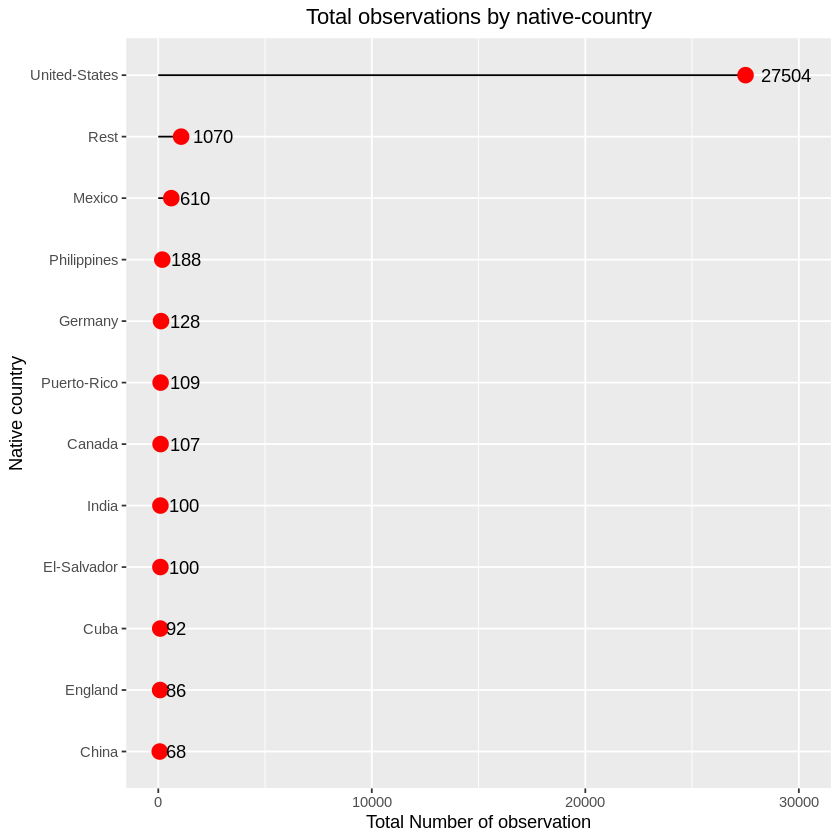

In [39]:
AdultUCI%>%group_by(`native-country`)%>%
                         summarise(total = n()) %>%
  arrange(total)%>% 
  mutate(name=factor(`native-country`, levels=`native-country`)) %>%  
  ggplot( aes(x=name, y=total)) +
  ggtitle("Total observations by native-country")+
    geom_segment( aes(xend=name, yend=0)) +
    geom_point( size=4, color="red") +
  geom_text(aes(label=total),hjust = -0.3)+ 
  ylim(c(0,30000))+
    coord_flip() +theme(plot.title = element_text(hjust = 0.5))+
    xlab("Native country") +
    ylab("Total Number of observation")

A huge number of observatons are from United states.
## Multicollinearity Checking

In [40]:
cx<-c('age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week')
corr_data<- AdultUCI[,cx]
round(cor(corr_data), 2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.04,0.08,0.06,0.10
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02
education-num,0.04,-0.04,1.00,0.12,0.08,0.15
capital-gain,0.08,0.00,0.12,1.00,-0.03,0.08
capital-loss,0.06,-0.01,0.08,-0.03,1.00,0.05
hours-per-week,0.10,-0.02,0.15,0.08,0.05,1.00


One way to test for multicollinearity is by creating a correlation matrix.

A correlation matrix (or correlogram) visualizes the correlation between multiple continuous variables. Correlations range always between -1 and +1, where -1 represents perfect negative correlation and +1 perfect positive correlation.

Correlations close to-1 or +1 might indicate the existence of multicollinearity. As a rule of thumb, one might suspect multicollinearity when the correlation between two (predictor) variables is below -0.75 or above +0.75. Since, all the values are lies between -0.75 to 0.75, we can say that there are no multicollinearity problem.

corrplot 0.92 loaded



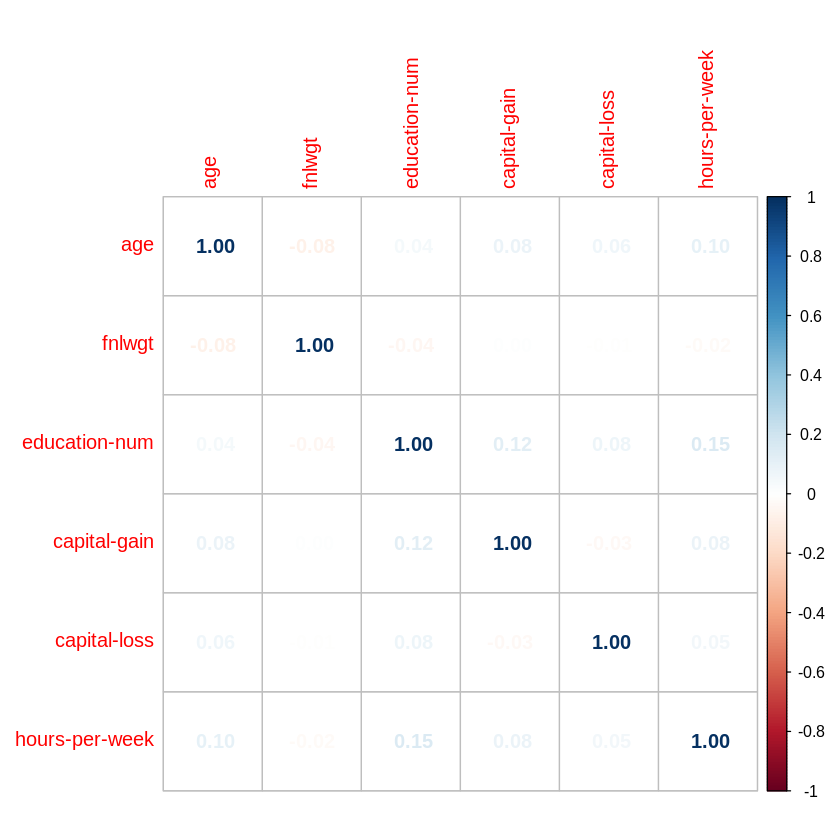

In [41]:
library("corrplot")
corrplot(cor(corr_data), method = "number")

We show here the correlation matrix graphically.

## Data Partition

In [42]:
set.seed(555)
ind <- sample(2, nrow(AdultUCI),
              replace = TRUE,
              prob = c(0.6, 0.4))
training <- AdultUCI[ind==1,]
testing <- AdultUCI[ind==2,]

We split the data set into train and test with 60% and 40% for model training and testing.

# Models

We will use training and testing data to estimate what factors contribute to little or high incomes for analytical purposes. To accurately predict the category of income, three well-known ML algorithms---Logistic Regression (LR), Decision Tree (DT), and Naive Bayes Classier---have been taken into consideration. Additionally, accuracy was used to conduct a thorough evaluation of the algorithms.

## Logistic Regression Model

An algorithm for categorization is the logistic regression model. A set of independent factors are utilized to predict a binary result using this method[1].When dealing with binary data, the proper form of analysis to use is logistic regression. When the dependent variable or output is categorical or dichotomous, that is, if it falls into one of two categories (such as "yes" or "no," "pass" or "fail," and so on), we are working with binary data. The independent variables, however, can belong to any of the following groups: 1. Continuous 2. Discrete and ordinal 3. Discrete, nominal

## Decision Tree (DT)

A classification or regression tree analysis can be performed using the machine learning technique known as Decision Tree. The decision tree can be seen graphically as a tree structure with leaves and branches[2]. The branches are the criteria to make decisions for the class of data set, whereas the leaves are often the data points.

## Naive Bayes Classifier

A supervised non-linear classification algorithm is Naive Bayes. A family of straightforward probabilistic classifiers known as Naive Bayes classifiers is built on using Baye's theorem with strong (Naive) independence assumptions across the features or variables[3]. Because it assumes that the occurrence of one feature is unrelated to the occurrence of other features, the Naive Bayes method is known as "Naive."

## Accuracy

The most popular machine learning model validation technique for categorization issues is probably accuracy. Its success may be attributed in part to its relative simplicity. [4] It is simple to comprehend and put into practice. For straightforward circumstances, accuracy is a useful statistic to evaluate the performance of a model. In classification issues, accuracy is a metric that expresses the proportion of accurate predictions.

# Results

## Models

### Logistic Regression Model

Now, we will try to fit a logistic regression model to our training data


In [43]:
options(scipen = 999)
model_lr <- glm(income~., family="binomial", data=training)
summary(model_lr)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = income ~ ., family = "binomial", data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0899  -0.5199  -0.1915  -0.0059   3.8519  

Coefficients:
                                            Estimate     Std. Error z value
(Intercept)                            -8.4318385340   0.7529997675 -11.198
age                                     0.0211269060   0.0021733676   9.721
workclassLocal-gov                     -0.5991517922   0.1459122413  -4.106
workclassPrivate                       -0.4569749767   0.1213523957  -3.766
workclassSelf-emp-inc                  -0.2411936825   0.1581477334  -1.525
workclassSelf-emp-not-inc              -0.9116620635   0.1430403206  -6.373
workclassState-gov                     -0.6540037490   0.1594486987  -4.102
workclassWithout-pay                  -11.9700973005 150.3697173507  -0.080
fnlwgt                                  0.0000005603   0.0000002308   2.427
education.L                             

The model's significant variables are those variables which have a very low P-Value (less than .05).These variables have a significant effect on our dependent variable.

The difference between Null deviance and Residual Deviance tells us that the model is a good fit. The greater the difference, the better the model. Null deviance is the value when there is only an intercept in our equation with no variables, and residual deviance is the value when all variables are considered. It makes sense to consider the model good if that difference is big enough.

Now we are calculating odds ratio and express them together with estimate and z value.

In [44]:
sk<-summary(model_lr)
dh<-sk$coefficients
odds_ratio <- exp(dh[ ,"Estimate"])
cbind(dh[,c("Estimate","z value")],odds_ratio)

,Estimate,z value,odds_ratio
(Intercept),-8.431838534000,-11.197664193,0.000217820651
age,0.021126905992,9.720815966,1.021351659059
workclassLocal-gov,-0.599151792154,-4.106247609,0.549277339908
workclassPrivate,-0.456974976654,-3.765685662,0.633196184552
workclassSelf-emp-inc,-0.241193682492,-1.525116278,0.785689437363
workclassSelf-emp-not-inc,-0.911662063497,-6.373462110,0.401855758884
workclassState-gov,-0.654003749016,-4.101656233,0.519959815116
workclassWithout-pay,-11.970097300479,-0.079604441,0.000006330715
fnlwgt,0.000000560326,2.427371397,1.000000560326
education.L,0.211514980540,1.161903674,1.235548474673


#### Model Prediction

To check the efficiency of the model, we are now going to run the model on testing data set, after which we will evaluate the accuracy of the model by using a confusion matrix.

In [45]:
# and those who are not
predict_lr<-predict(model_lr,testing,type = "response" )

#### Confusion Matrix and Accuracy

In [48]:
predict_results <- ifelse(predict_lr > 0.5,'large','small')
predict_results<-factor(predict_results,levels=c('small','large'), ordered=TRUE)
cm_lr <- table(testing$income, predict_results)
confusionMatrix(cm_lr)

Confusion Matrix and Statistics

       predict_results
        small large
  small  8350   648
  large  1183  1787
                                               
               Accuracy : 0.847                
                 95% CI : (0.8404, 0.8534)     
    No Information Rate : 0.7965               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.5637               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.8759               
            Specificity : 0.7339               
         Pos Pred Value : 0.9280               
         Neg Pred Value : 0.6017               
             Prevalence : 0.7965               
         Detection Rate : 0.6977               
   Detection Prevalence : 0.7518               
      Balanced Accuracy : 0.8049               
                    

Our predicted results show that the model correctly classified 8350+1787 = 10137 from 11968 observations, and our model accuracy is 84.70% based on testing data.

### Decision Tree

The decision tree algorithm works based on the decision on the conditions of the features. Nodes are the conditions or tests on an attribute. A branch represents the outcome of the tests, and leaf nodes are the decisions based on the conditions. This time, we will use a decision tree model using the `rpart()` function for prediction of the income category for the training data.

In [49]:
##Build Decision tree model
set.seed(84)
tmodel <- rpart(income~., training, cp=0, method = "class")
printcp(tmodel)

min(tmodel$cptable[,4])


Classification tree:
rpart(formula = income ~ ., data = training, method = "class", 
    cp = 0)

Variables actually used in tree construction:
 [1] age            capital-gain   capital-loss   education      education-num 
 [6] fnlwgt         hours-per-week marital-status native-country occupation    
[11] race           relationship   sex            workclass     

Root node error: 4538/18194 = 0.24942

n= 18194 

            CP nsplit rel error  xerror     xstd
1  0.133208462      0   1.00000 1.00000 0.012861
2  0.063904804      2   0.73358 0.73358 0.011492
3  0.037681798      3   0.66968 0.66968 0.011087
4  0.008814456      4   0.63200 0.62979 0.010816
5  0.008373733      6   0.61437 0.62032 0.010749
6  0.005949758      7   0.60599 0.60401 0.010632
7  0.003790216      8   0.60004 0.59916 0.010597
8  0.001983253     14   0.57536 0.58219 0.010472
9  0.001762891     22   0.55311 0.57360 0.010407
10 0.001615984     24   0.54958 0.57272 0.010401
11 0.001322168     27   0.54473 0.57250 

[1] 0.5678713


Here, we can observe that the minimum value of xerror (cross validation error) is 0.56787. So, we can use the value of cp for this to get the optimal pruned decision tree model.

In [50]:
tmodel<-prune(tmodel,cp=0.000991626)

#### Decision Tree Plot

The decision tree plot visualizes how the full model works under certain conditions and also describes the root nodes and leaf nodes that actually illustrate the final decision.

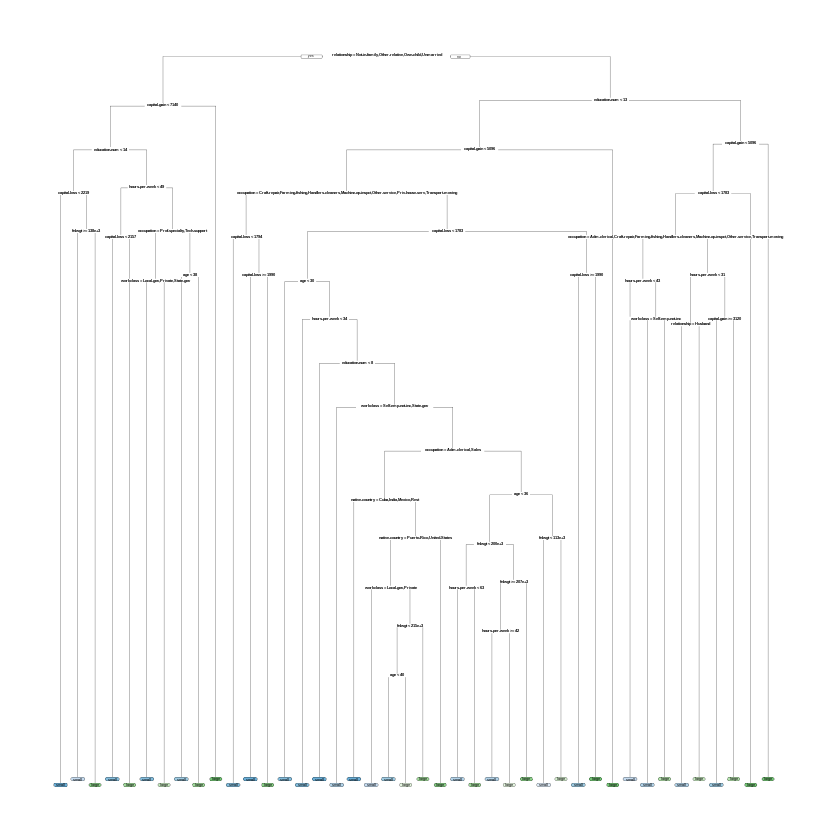

In [55]:
rpart.plot(tmodel, type = 0, extra = 0)

#### Model Prediction

To check the efficiency of the model, we are now going to run the model on testing data set, after which we will evaluate the accuracy of the model by using a confusion matrix.

#### Confusion Matrix and Accuracy

To check the efficiency of the model, we are now going to run the model on testing data set, after which we will evaluate the accuracy of the model by using a confusion matrix.

In [57]:
predicted_class <- predict(tmodel, testing, type = "class")
predicted_class <-factor(predicted_class,levels=c('small','large'), ordered=TRUE)
confusionMatrix(predicted_class, testing$income)

Confusion Matrix and Statistics

          Reference
Prediction small large
     small  8505  1211
     large   493  1759
                                               
               Accuracy : 0.8576               
                 95% CI : (0.8512, 0.8638)     
    No Information Rate : 0.7518               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.5848               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.9452               
            Specificity : 0.5923               
         Pos Pred Value : 0.8754               
         Neg Pred Value : 0.7811               
             Prevalence : 0.7518               
         Detection Rate : 0.7106               
   Detection Prevalence : 0.8118               
      Balanced Accuracy : 0.7687               
              

Our predicted results show that the model correctly classified 8505+1759 = 10264 from 11968 observations, and our model accuracy is 85.76% based on testing data.

### Naive Bayes Classifier

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Baye's theorem with strong(Naive) independence assumptions between the features or variables.

In [58]:
#Naive Bayes classifier
classifier_cl <- naiveBayes(income ~ ., data =training)
summary(classifier_cl)

          Length Class  Mode     
apriori    2     table  numeric  
tables    14     -none- list     
levels     2     -none- character
isnumeric 14     -none- logical  
call       4     -none- call     

#### Model Prediction

To check the efficiency of the model, we are now going to run the model on testing data set.

In [59]:
# Predicting on train data'
y_pred <- predict(classifier_cl, newdata = testing)
y_pred<-factor(y_pred,levels=c('small','large'), ordered=TRUE)

#### Confusion Matrix and Accuracy

Now, we will evaluate the accuracy of the model by using a confusion matrix.

In [60]:
# Confusion Matrix
confusionMatrix(testing$income, y_pred)

Confusion Matrix and Statistics

          Reference
Prediction small large
     small  8366   632
     large  1523  1447
                                             
               Accuracy : 0.8199             
                 95% CI : (0.8129, 0.8268)   
    No Information Rate : 0.8263             
    P-Value [Acc > NIR] : 0.9671             
                                             
                  Kappa : 0.4635             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.8460             
            Specificity : 0.6960             
         Pos Pred Value : 0.9298             
         Neg Pred Value : 0.4872             
             Prevalence : 0.8263             
         Detection Rate : 0.6990             
   Detection Prevalence : 0.7518             
      Balanced Accuracy : 0.7710             
                                             
    

Our predicted results show that the model correctly classified 8366+1447 from 11968 observations, and our model accuracy is 81.99% based on testing data.

Among the three classification algorithm Logistic regression predicts well our testing dataset.

# Conclusion

We have used three classification models to predict or classify our dependent variable income. The variable income has two categories: small and large. We intend to classify that income variable into those two categories based on the impact of other independent variables.

### Logistic Regression

Using logistic regression model, we create a generalized linear model where independent variables stay at the right side of the equation and logit function of dependent variable stays at the right side of the equation. By using that model equation we can predict the value of income that it will be small or large. After predicting the values of income from the test dataset, we have checked the accuracy by comparing the predicted values with actual (Reference) value. We want to achieve the highest percentage of match between those predicted and actual values.

We have seen from the confusion matrix that the accuracy of logistic regression was 84.70%.

### Decision Tree

Using decision tree model, we create a classification model where for different conditional state of independent variables, the value of dependent variable income is predicted. By using that decision tree plot and it's nodes, we can predict the value of income that it will be small or large. After predicting the values of income from the test dataset, we have checked the accuracy by comparing the predicted values with actual (Reference) value. We want to achieve the highest percentage of match between those predicted and actual values.

We have seen from the confusion matrix that the accuracy of decision tree was 85.76%.

### Naive Bayes Classifier

Using naive bayes classifier model, we create a classification model where the probabilities of independent variables are used for predicing dependent variable income. By using that naive bayes classifier model, we can predict the value of income that it will be small or large based on the posterior probabilities of different independent variables. The higher probability in each independent variable is responsible here for the prediction of income to be small or large. After predicting the values of income from the test dataset, we have checked the accuracy by comparing the predicted values with actual (Reference) value. We want to achieve the highest percentage of match between those predicted and actual values.

We have seen from the confusion matrix that the accuracy of naive bayes classifier was 81.99%.

**Finally, we can conclude that the best model for predicting income will be the decision tree model because it shows the highest accuracy (85.76%) among those three models.**

### Prediction from Decision Tree

From the decision tree, we can say that if **relationship** is *Not-in-family, Other-relative, Own-child, or Unmarried*, **capital gain** is *less than 7140*, **education-num** is *less than 14*, **capital-loss** is *not less than 2219*, and **fnlwgt** is *not greater than 138000* the probability of more than 50k income is ***higher***.

We can also say that if **relationship** is *Not-in-family, Other-relative, Own-child, or Unmarried*, **capital gain** is *less than 7140*, **education-num** is *not* *less than 14*, **hours-per-week** is *less than 49*, and **capital-loss** is *not less than 2157* the probability of more than 50k income is ***higher***.

In this way we can explain each of those nodes from the Decision Tree to predict the income greater than 50k or not.

# Recommendations

-   Further analysis can be done using other types of classification and clustering methods.

-   Different new variables can be calculated from the existing one to increase the model accuracy.

-   We can also introduce dimensionality reduction techniques on the numeric variables and use those new variables for the models to get the optimal model.

# References

[1]Hosmer, David W., Trina Hosmer, Saskia Le Cessie, and Stanley Lemeshow. "A comparison of goodness‐of‐fit tests for the logistic regression model." Statistics in medicine 16, no. 9 (1997): 965-980.

[2]Charbuty, Bahzad, and Adnan Abdulazeez. "Classification based on decision tree algorithm for machine learning." Journal of Applied Science and Technology Trends 2, no. 01 (2021): 20-28.

[3]Rish, Irina. "An empirical study of the naive Bayes classifier." In IJCAI 2001 workshop on empirical methods in artificial intelligence, vol. 3, no. 22, pp. 41-46. 2001.

[4]Nindrea, Ricvan Dana, Teguh Aryandono, Lutfan Lazuardi, and Iwan Dwiprahasto. "Diagnostic accuracy of different machine learning algorithms for breast cancer risk calculation: a meta-analysis." Asian Pacific journal of cancer prevention: APJCP 19, no. 7 (2018): 1747.
